# Multilayer Neural Network

Done by Srujan : 200240128033

In [23]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import softmax
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [24]:
def generate_data(noise):
    X,y = datasets.make_moons(n_samples=1000,shuffle=True,random_state=42,noise=noise)
    return X,y

In [25]:
class NeuralNetwork:
    
    def __init__(self,X,y,layers,l_rate,reg_lambda):
        
        self.X = X
        self.y = y
        
        self.m = self.X.shape[0]  # m is number of samples in the dataset
        self.n = self.X.shape[1] # n in number of independent features
        
        self.l_rate = l_rate  # learning rate 
        self.reg_lambda = reg_lambda # regularization parameter
        
        # Initializing weights for hidden layers
        self.W1 = np.random.rand(layers[0],self.n)
        self.b1 = np.random.rand(1,layers[0])
        
        self.W2 = np.random.rand(layers[1],layers[0])
        self.b2 = np.random.rand(1,layers[1])
        
        self.W3 = np.random.rand(layers[2],layers[1])
        self.b3 = np.random.rand(1,layers[2])
    
    def tanh_derivative(self,a):
        
        return 1-np.power(a,2)
    
    def forward_prop(self):
        
        # forward propagation
        self.Z1 = np.dot(self.X,self.W1.T)+self.b1
        self.A1 = np.tanh(self.Z1)
        assert(self.Z1.shape == self.A1.shape),'Z1 and A1 shapes not equal'
        
        self.Z2 = np.dot(self.A1,self.W2.T)+self.b2
        self.A2 =  np.tanh(self.Z2)
        
        assert(self.Z2.shape == self.A2.shape),'Z2 and A2 shapes not equal'
        
        self.Z3 = np.dot(self.A2,self.W3.T)+self.b3
        self.y_hat = softmax(self.Z3,axis=1)
        
    def backward_prop(self):    
        
        # backward propagation
        self.y = self.y.reshape(self.y_hat.shape) # reshaping y into y_hat's shape to avoid wrong calculations 
        
        #layer 3
        self.dZ3 = self.y_hat - self.y 
        
        self.dW3 = np.dot(self.dZ3.T,self.A2)
        
        self.db3 = np.sum(self.dZ3,axis=0,keepdims=True)
        
        assert self.dW3.shape == self.W3.shape
        assert self.db3.shape == self.b3.shape

        #layer 2
        self.dZ2 = np.multiply( np.dot(self.dZ3,self.W3) , self.tanh_derivative(self.A2) )
        
        assert self.dZ2.shape == self.A2.shape,"dZ2 and A2 shapes not equal"
        
        self.dW2 = np.dot(self.dZ2.T,self.A1)
        
        self.db2 = np.sum(self.dZ2,axis=0,keepdims=True)
        
        assert self.dW2.shape == self.W2.shape
        assert self.db2.shape == self.b2.shape
        
        #layer 1
        
        self.dZ1 = np.multiply( np.dot(self.dZ2,self.W2) , self.tanh_derivative(self.A1) )
        
        self.dW1 = np.dot(self.dZ1.T,self.X)
        
        self.db1 = np.sum(self.dZ1,axis=0,keepdims=True)
        
        self.dW3 = self.dW3 + self.reg_lambda * self.dW3   # regularizing to reduce overfitting 
        self.db3 = self.db3 + self.reg_lambda * self.db3
        self.dW2 = self.dW2 + self.reg_lambda * self.dW2   # regularizing to reduce overfitting 
        self.db2 = self.db2 + self.reg_lambda * self.db2
        self.dW1 = self.dW1 + self.reg_lambda * self.dW1        
        self.db2 = self.db2 + self.reg_lambda * self.db2
        
        self.W3 = self.W3 - self.l_rate * self.dW3 # updating weights
        self.b3 = self.b3 - self.l_rate * self.db3 # updating bias
        self.W2 = self.W2 - self.l_rate * self.dW2 # updating weights
        self.b2 = self.b2 - self.l_rate * self.db2 # updating bias
        self.W1 = self.W1 - self.l_rate * self.dW1 # updating weights
        self.b1 = self.b1 - self.l_rate * self.db1 # updating bias
        
    def cost(self):

        loss = (-1/self.m) * np.sum ((np.multiply(np.log(self.y_hat),self.y)))
        
        loss = loss + (self.reg_lambda / (2*self.m) )*(np.sum(self.W1**2) + np.sum(self.W2**2) + np.sum(self.W3**2))            
        
        return loss
    
    def predict(self,x):
        
        Z1 = np.dot(x,self.W1.T) + self.b1 
        
        A1 = np.tanh(Z1)
        
        Z2 = np.dot(A1,self.W2.T) + self.b2
        
        A2 = np.tanh(Z2)
        
        Z3 = np.dot(A2,self.W3.T) + self.b3
        
        y_hat = softmax(Z3)  

        preds = np.argmax(y_hat,axis=1)

        y_preds = [1 if i>0.5 else 0 for i in preds]
        
        return y_preds

In [26]:
X,y = datasets.make_moons(n_samples=1000,shuffle=True,random_state=42,noise=0.2)
y = y.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y ,random_state=42)

In [27]:
onehot = OneHotEncoder(sparse=False)
y_transformed_train = onehot.fit_transform(y_train)
y_transformed_test = onehot.transform(y_test)

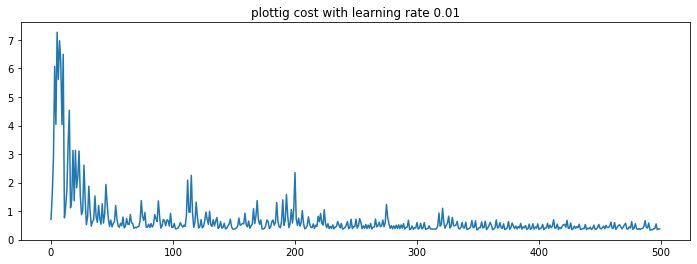

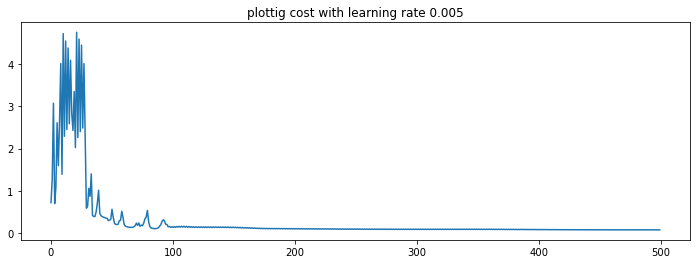

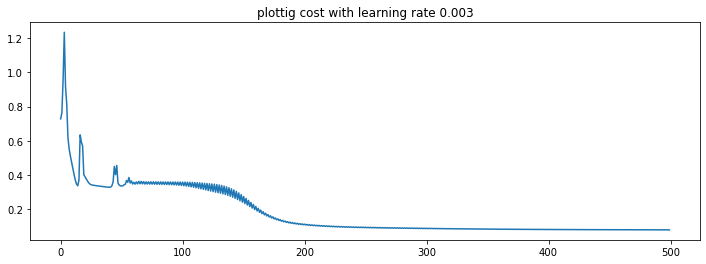

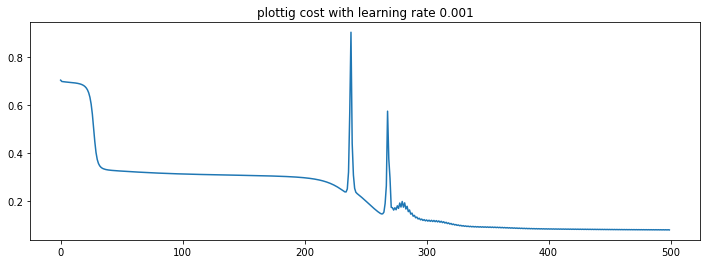

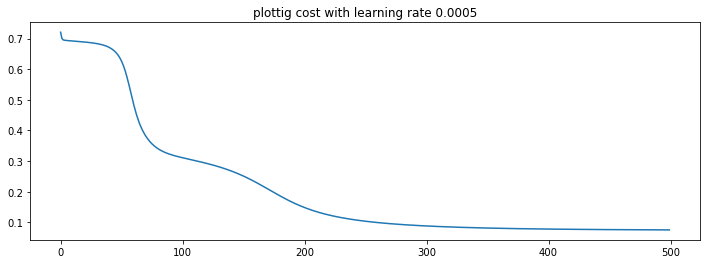

In [28]:
learning_rates = [0.01,0.005,0.003,0.001,0.0005]

for lr in learning_rates:  # different learning rates

    cost_list = []
    p = NeuralNetwork(X_train,y_transformed_train,[3,3,2],lr,0.003) # creating object

    for epoch in range(0,500): # training for  500 epochs 

        p.forward_prop() # forward propagation 
        p.backward_prop() # backward propagation 
        cost_list.append(p.cost()) #apending cost after every epoch to a list 

    plt.figure(figsize=(12,4)) # plotting cost for every learning rate
    x_vals = list(range(500))
    sns.lineplot(x=x_vals,y=cost_list)
    plt.title(f'plottig cost with learning rate {lr}')
    
    y_train_preds = p.predict(X_train)  # converting output of sigmoid into predictions
    y_test_preds = p.predict(X_test)

    train_accuracy = accuracy_score(y_train,y_train_preds)
    test_accuracy = accuracy_score(y_test,y_test_preds)